1. VIẾT CHƯƠNG TRÌNH XỬ LÝ ĐIỂM ẢNH

1.1 Biến đổi cường độ ảnh (Image inverse tranformantion)

[[136 136 137 ... 122 122 123]
 [136 135 136 ... 116 125 126]
 [134 133 137 ... 122 128 123]
 ...
 [168 170 169 ... 177 174 174]
 [167 159 158 ... 171 172 177]
 [166 165 162 ... 176 174 174]]


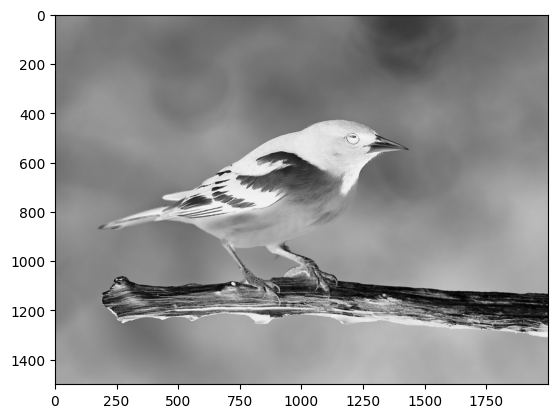

In [64]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
# mở ảnh đen trắng
img = Image.open('bird.png').convert('L')
# đảo ảnh dạng 'L' sang mảng 1 số (matrix)
im_1 = np.asarray(img)
# thực hiện thuật toán tử nghịch đảo
im_2 = 255 - im_1
# chuyên ảnh từ 2 ảnh tử mảng số thành ảng trở lại
print(im_2)
new_img = Image.fromarray(im_2)
img.show()
plt.imshow(new_img, cmap = 'gray')
plt.show()


1.2 Thay đổi chất lượng ảnh với Power law(Gamma-Correction)

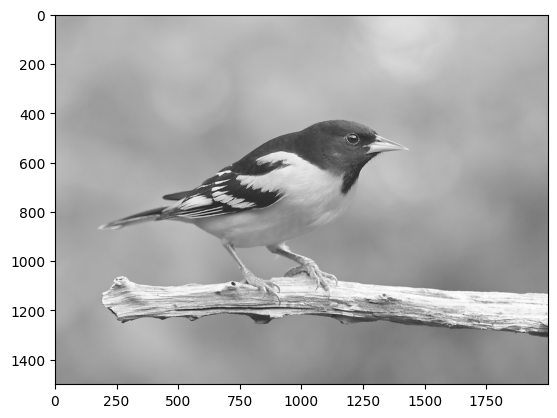

In [65]:
from PIL import Image
import numpy as np
import matplotlib.pylab as plt
# Mở ảnh đen trắng
img = Image.open('bird.png').convert('L')
# Đảo ảnh dạng "L" sang 1 mảng số
im_1 = np.asarray(img)
# Gamma ban đầu
gamma = 0.5
# Chuyển matrix từ số nguyên sang số thực
b1 = im_1.astype(float)
# Tìm giá trị lớn nhất trong B1
b2 = np.max(b1)
# Chuẩn hóa B1 (tức là chuyển các giá trị b1 về khoảng [0,1])
b3 = (b1+1) / b2
# Tính tương quan hàm mũ gamma (logarit nhân gamma)
b4 = np.log(b3) * gamma
# Tính tương quan hàm mũ gamma và quy về khoảng [0,255]
c = np.exp(b4) * 255.0
# Chuyển c về số nguyên
c1 = c.astype(np.uint8)
d = Image.fromarray(c1)
img.show()
new_img.show()
plt.imshow(d, cmap='gray')
plt.show()


1.3 Thay đổi cường độ điểm ảnh với log tranformation


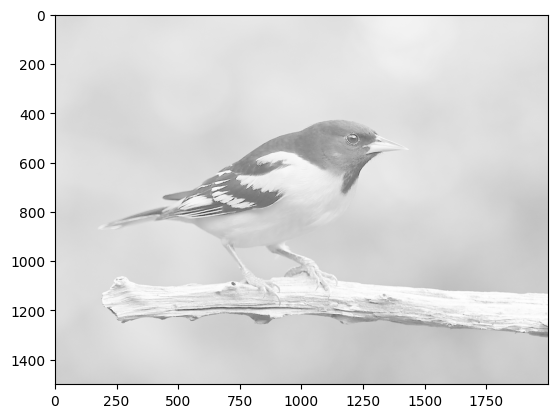

In [66]:
from PIL import Image
import numpy as np
import matplotlib.pylab as plt

# Mở ảnh đen trắng
img = Image.open('bird.png').convert('L')
# Đảo ảnh dạng "L" sang 1 mảng số
im_1 = np.asarray(img)
# Gamma ban đầu
gamma = 0.5
# Chuyển matrix từ số nguyên sang số thực
b1 = im_1.astype(float)
# Tìm giá trị lớn nhất trong B1
b2 = np.max(b1)
# biến đổi log
c = (128.0*np.log(1+b1)) / np.log(1+b2) 
# Chuyển c về số nguyên
c1 = c.astype(np.uint8)
d = Image.fromarray(c1)
img.show()
new_img.show()
plt.imshow(d, cmap='gray')
plt.show()


1.4 Histogram equalization


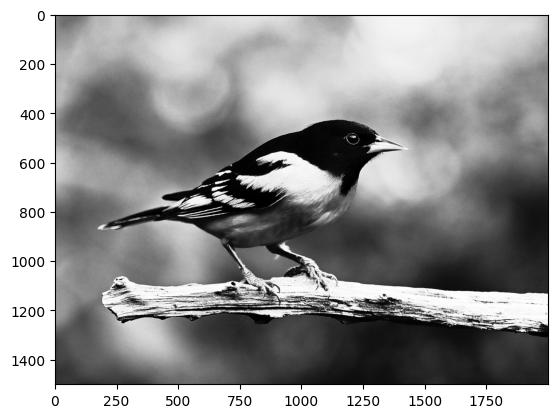

In [67]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# open a grayscale image
img = Image.open('bird.png').convert('L')

# convert image i into an ndarray
im1 = np.asarray(img)

# convert 2D ndarray from 1D array
b1 = im1.flatten()

# histogram and bin are computed
hist, bins = np.histogram(im1, 256, [0, 255])

# cumulative distribution function is computed
cdf = hist.cumsum()

# places where cdf=0 is masked or ignored and rest is stored in cdf_m
cdf_m = np.ma.masked_equal(cdf, 0)

# histogram equalization is performed
num_cdf = (cdf_m - cdf_m.min()) * 255
den_cdf = (cdf_m.max() - cdf_m.min())
cdf = num_cdf / den_cdf

# the masked places in cdf_m are now 0
cdf = np.ma.filled(cdf, 0).astype('uint8')

# new values are assigned in the flattened array
im2 = cdf[b1]

# this is 1D so we use reshape command to make it into 2D
im3 = np.reshape(im2, im1.shape)

# converting im3 to an image
im4 = Image.fromarray(im3)

img.show()
im4.show()
plt.imshow(im4, cmap="gray")
plt.show()


1.5 Thay đổi ảnh với Contrast Stretching


0 255


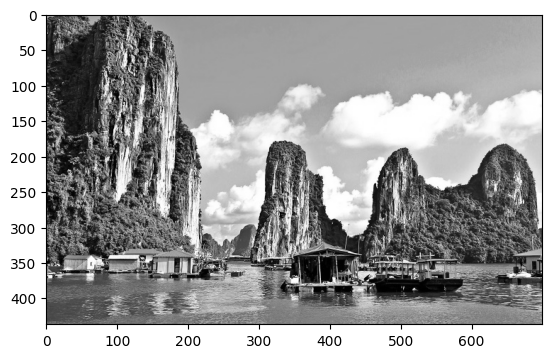

In [83]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
# open a grayscale image
img = Image.open('exercise/ha-long-bay-in-vietnam.jpg').convert('L')
# convert image into an ndarray
im1 = np.asarray(img)
# finding the maximum and minimum pixel values
b = im1.max()
a = im1.min()
print(a, b)
# converting im1 to float
c = im1.astype(float)
# contrast stretching transformation
im2 = 255 * (c - a) / (b - a)
# im2 is converted from ndarray to image
im3 = Image.fromarray(im2)
img.show()
im3.show()
plt.imshow(im3)
plt.show()


1.6 Biến đổi Fourier 1.6.1. Biến đổi ảnh với Fast Fourier

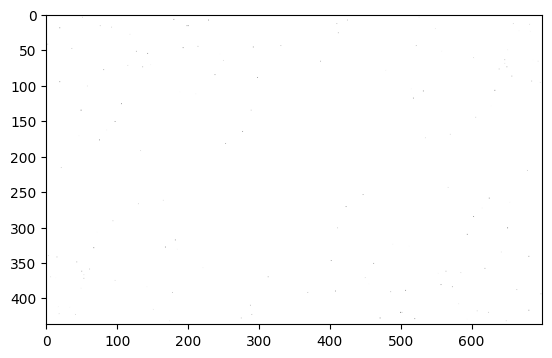

In [69]:

from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# open a grayscale image
img = Image.open('exercise/ha-long-bay-in-vietnam.jpg').convert('L')

# convert image into an ndarray
im1 = np.array(img)

# performing FFT
c = abs(scipy.fftpack.fft2(im1))

# shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)
d = d.astype(float)

# im2 is converted from ndarray to image
im3 = Image.fromarray(d)

img.show()
im3.show()
plt.imshow(im3, cmap="gray")
plt.show()

1.6.2 Lọc ảnh trong miền tần xuất

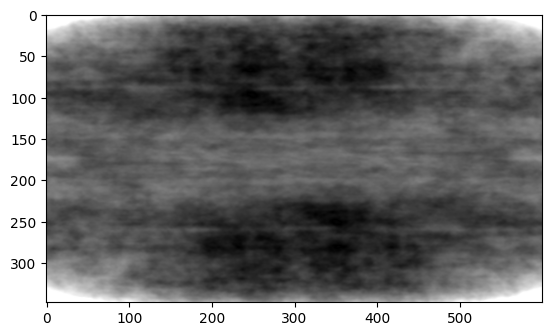

In [70]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
# open a grayscale image
img = Image.open('exercise/pagoda.jpg').convert('L')
# convert image into an ndarray
im1 = np.asarray(img)
# performing FFT
c = abs(scipy.fftpack.fft2(im1))
# shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)
# initializing variables for convolution function
M = d.shape[0]
N = d.shape[1]
# H is defined and values in H are initialized to 1
H = np.ones((M, N))
center1 = M / 2
center2 = N / 2
r0 = 30.0  # cut-off radius
t = 1      # the order of BLPF (Butterworth Lowpass Filter)
t2 = 2 * t
# defining the convolution function for BLPF
for i in range(1, M):
    for j in range(1, N):
        r1 = (i - center1)**2 + (j - center2)**2
        # Euclidean distance from origin is computed
        r = math.sqrt(r1)
        # using cut-off radius to eliminate high frequency
        if r > 0:
            H[i, j] = 1 / (1 + (r / r0)**t2)
# H is converted from ndarray to image
H1 = H.astype(float)
H = Image.fromarray(H1)
# performing the convolution
con = d * H1
# computing the magnitude of the inverse FFT
e = abs(scipy.fftpack.ifft2(con))
e = e.astype(float)
# im3 is converted from ndarray to image
im3 = Image.fromarray(e)
img.show()
H.show()
plt.imshow(im3)
plt.show()


Butterworth highpass Filter

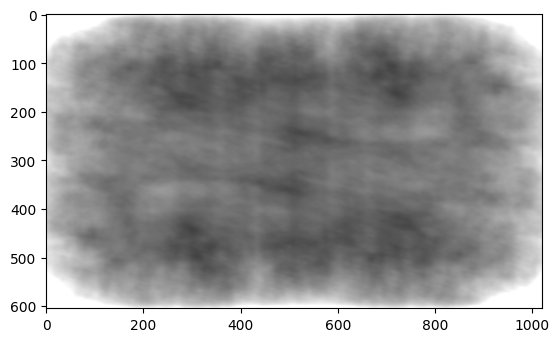

In [71]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
# open a grayscale image
img = Image.open('exercise/quang_ninh.jpg').convert('L')
# convert image into an ndarray
im1 = np.asarray(img)
# performing FFT
c = abs(scipy.fftpack.fft2(im1))
# shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)
# initializing variables for convolution function
M = d.shape[0]
N = d.shape[1]
# H is defined and values in H are initialized to 1
H = np.ones((M, N))
center1 = M / 2
center2 = N / 2
r0 = 30.0   # cut-off radius
t1 = 1      # the order of BLPF (Butterworth Lowpass Filter)
t2 = 2 * t1
# defining the convolution function for BLPF
for i in range(1, M):
    for j in range(1, N):
        r1 = (i - center1)**2 + (j - center2)**2
        # euclidean distance from origin is computed
        r = math.sqrt(r1)
        # using cut-off radius to eliminate high frequency
        if r > 0:
            H[i, j] = 1 / (1 + (r / r0)**t2)
# H is converted from ndarray to image
H1 = H.astype(float)
H = Image.fromarray(H1)
# performing the convolution
con = d * H1
# computing the magnitude of the inverse FFT
e = abs(scipy.fftpack.ifft2(con))
e = e.astype(float)
# im3 is converted from ndarray to image
im3 = Image.fromarray(e)
img.show()
H.show()
plt.imshow(im3)
plt.show()

2. BÀI TẬP


1. Vết chương trình để menu cho phép người dùng chọn các phương pháp biến đổi ảnh nhur sau:
- Image inverse transformation
- Gamma-Correction
- Log-Transformation
- Histogram equalization
- Contrast Stretching
- Khi nhập đúng vào phim I, G, L, H, C thì chương trình sẽ thực hiện hàm tương ứng cho các bài này. Lưu ý khi thực hiện các bài tập, các bạn cần làm bài đúng.

I: Image Inverse
G: Gamma Correction
L: Log Transformation
H: Histogram Equalization
C: Contrast Stretching


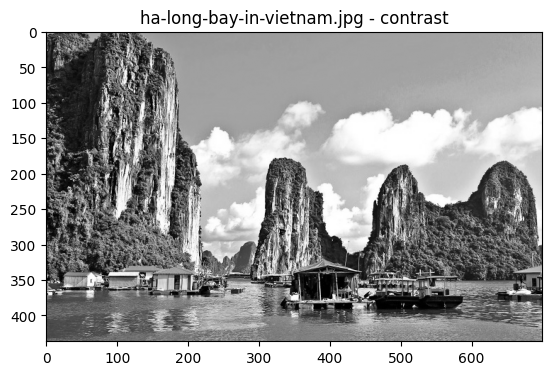

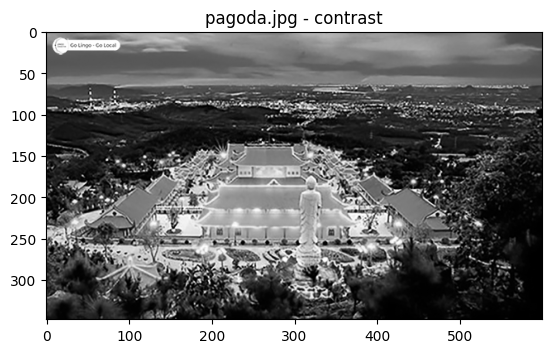

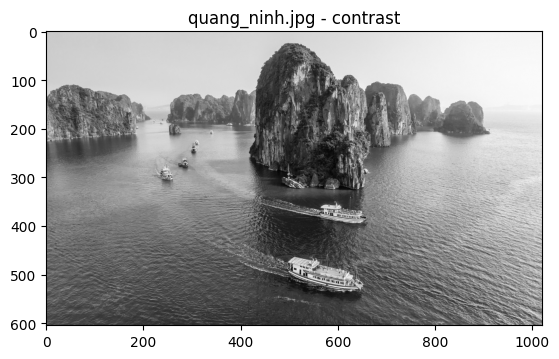

In [88]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

def img_inv(img):
    return Image.fromarray(255 - np.asarray(img))

def gamma_corr(img, gamma=0.5):
    a = np.asarray(img).astype(float)
    m = np.max(a)
    a = (a + 1) / m
    a = np.exp(np.log(a) * gamma) * 255
    return Image.fromarray(a.astype(np.uint8))

def log_transform(img):
    a = np.asarray(img).astype(float)
    m = np.max(a)
    a = (128 * np.log(1 + a)) / np.log(1 + m)
    return Image.fromarray(a.astype(np.uint8))

def hist_eq(img):
    a = np.asarray(img)
    flat = a.flatten()
    hist, _ = np.histogram(a, 256, [0, 255])
    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf, 0).astype('uint8')
    eq = cdf[flat].reshape(a.shape)
    return Image.fromarray(eq)

def contrast_stretch(img):
    a = np.asarray(img).astype(float)
    stretched = 255 * (a - a.min()) / (a.max() - a.min())
    return Image.fromarray(stretched.astype(np.uint8))

def apply_transformation(func, folder, save_folder, suffix):
    for file in os.listdir(folder):
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            path = os.path.join(folder, file)
            img = Image.open(path).convert('L')
            out = func(img)
            plt.imshow(out, cmap='gray')
            plt.title(f"{file} - {suffix}")
            plt.show()
            name = os.path.splitext(file)[0] + f"_{suffix}.png"
            out.save(os.path.join(save_folder, name))

os.makedirs("result", exist_ok=True)

transform_map = {
    'I': (img_inv, 'inverse'),
    'G': (gamma_corr, 'gamma'),
    'L': (log_transform, 'log'),
    'H': (hist_eq, 'hist'),
    'C': (contrast_stretch, 'contrast')
}

print("I: Image Inverse")
print("G: Gamma Correction")
print("L: Log Transformation")
print("H: Histogram Equalization")
print("C: Contrast Stretching")

choice = input("Nhập lựa chọn (I, G, L, H, C): ").upper()

if choice in transform_map:
    func, name = transform_map[choice]
    apply_transformation(func, "exercise", "result", name)
else:
    print("Lựa chọn không hợp lệ.")

2. Viết chương trình tạo menu cho phép người dùng chọn các phương pháp biến đổi ảnh như sau:
- Fast Fourier
- Butterworth Lowpass Filter
- Butterworth Hightpass Filter
- Khi người dùng ấn phím F, L, H thì chương trình sẽ được thực hiện trong mục exercise. Lưu và hiển thị các ảnh đã biến đổi

F: Fast Fourier
L: Butterworth Lowpass
H: Butterworth Highpass


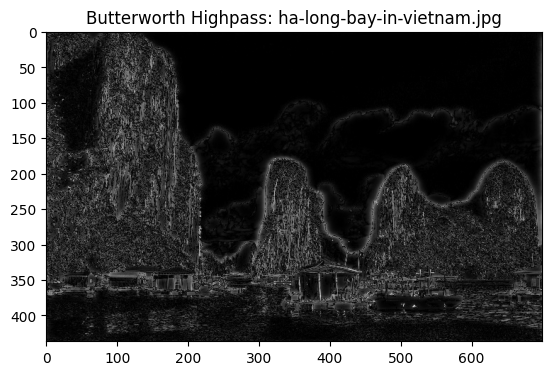

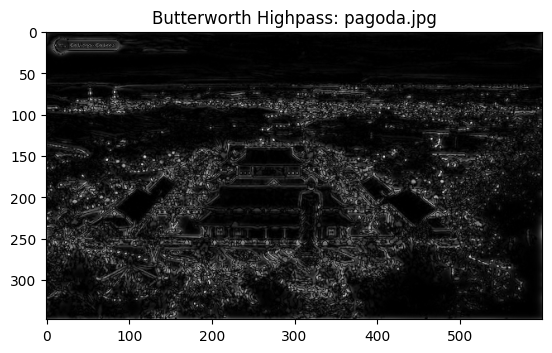

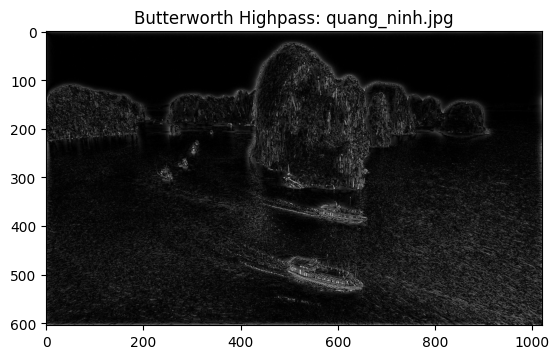

In [91]:
from PIL import Image
import numpy as np
import scipy.fftpack
import matplotlib.pyplot as plt
import os
import math

def Fast_Fourier(img):
    fft_result = abs(scipy.fftpack.fft2(img))
    chuyen = scipy.fftpack.fftshift(fft_result)
    return chuyen

def Butterworth_Lowpass(img, r0=30.0, t=1):
    M, N = img.shape
    H = np.ones((M, N))
    center1, center2 = M / 2, N / 2
    for i in range(M):
        for j in range(N):
            r = math.sqrt((i - center1) ** 2 + (j - center2) ** 2)
            if r > 0:
                H[i, j] = 1 / (1 + (r / r0) ** (2 * t))
    return apply_filter(img, H)

def Butterworth_Highpass(img, r0=30.0, t=1):
    M, N = img.shape
    H = np.zeros((M, N))
    center1, center2 = M / 2, N / 2
    for i in range(M):
        for j in range(N):
            r = math.sqrt((i - center1) ** 2 + (j - center2) ** 2)
            if r > 0:
                H[i, j] = 1 / (1 + (r0 / r) ** (2 * t))
    return apply_filter(img, H)

def apply_filter(img, H):
    fft = scipy.fftpack.fft2(img)
    fft_shift = scipy.fftpack.fftshift(fft)
    filtered = fft_shift * H
    inverse_fft = abs(scipy.fftpack.ifft2(filtered))
    return inverse_fft

def apply_transformation(func, input_folder, output_folder, method_name):
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
            path = os.path.join(input_folder, filename)
            img = Image.open(path).convert('L')
            img_array = np.array(img)
            result = func(img_array)
            result_img = Image.fromarray(np.clip(result, 0, 255).astype(np.uint8))
            save_path = os.path.join(output_folder, f"{method_name.replace(' ', '_')}_{filename}")
            result_img.save(save_path)
            plt.imshow(result, cmap='gray')
            plt.title(f"{method_name}: {filename}")
            plt.show()

transform_map = {
    'F': (Fast_Fourier, 'Fast Fourier'),
    'L': (Butterworth_Lowpass, 'Butterworth Lowpass'),
    'H': (Butterworth_Highpass, 'Butterworth Highpass'),
}
print("F: Fast Fourier")
print("L: Butterworth Lowpass")
print("H: Butterworth Highpass")

choice = input("Nhập lựa chọn (F, L, H): ").strip().upper()

if choice in transform_map:
    func, name = transform_map[choice]
    apply_transformation(func, "exercise", "result", name)
else:
    print("Lựa chọn không hợp lệ.")


3. Viết chương trình thay đổi màu thứ tự màu RGB của ảnh trong thư mục excercise và sử dụng ngẫu nhiên một trong các phép biến đổi ảnh trong câu 1. Lưu và hiển thị ảnh đã biến đổi.

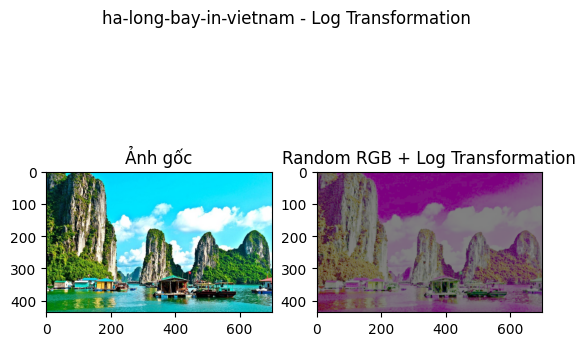

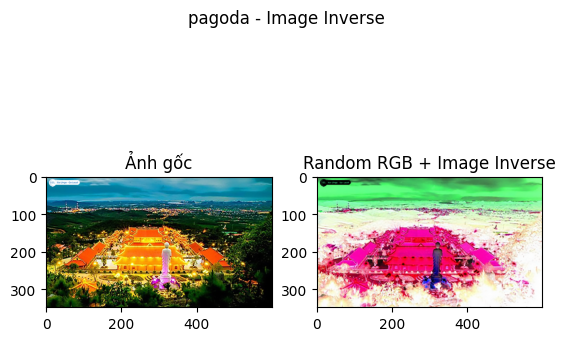

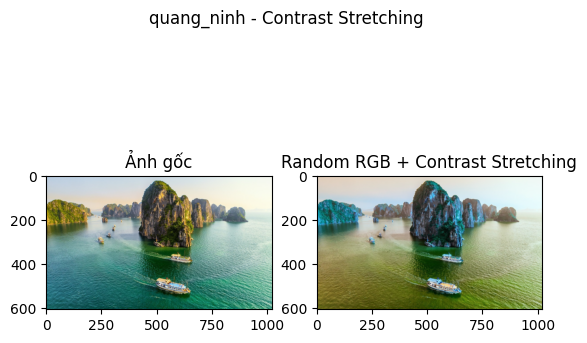

In [ ]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pyplot as plt
import pathlib
import random
from PIL import Image

def img_inv(img):
    im1 = np.asarray(img)
    im2 = 255 - im1
    return Image.fromarray(im2.astype(np.uint8))

def gamma_corr(img, gamma=0.5):
    a = np.asarray(img).astype(float)
    m = np.max(a)
    a = (a + 1) / m
    a = np.exp(np.log(a) * gamma) * 255
    return Image.fromarray(a.astype(np.uint8))

def log_transform(img):
    a = np.asarray(img).astype(float)
    m = np.max(a)
    a = (128 * np.log(1 + a)) / np.log(1 + m)
    return Image.fromarray(a.astype(np.uint8))

def hist_equa(img):
    a = np.asarray(img)
    flat = a.flatten()
    hist, _ = np.histogram(flat, 256, [0, 256])
    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf, 0).astype('uint8')
    eq = cdf[flat].reshape(a.shape)
    return Image.fromarray(eq)

def contrast_stretch(img):
    a = np.asarray(img).astype(float)
    stretched = 255 * (a - a.min()) / (a.max() - a.min())
    return Image.fromarray(stretched.astype(np.uint8))

transformations = {
    'I': ('Image Inverse', img_inv),
    'G': ('Gamma Correction', gamma_corr),
    'L': ('Log Transformation', log_transform),
    'H': ('Histogram Equalization', hist_equa),
    'C': ('Contrast Stretching', contrast_stretch)
}

def process_image(path):

    original_img = Image.open(str(path)).convert('RGB')  # ảnh gốc để hiển thị
    img = original_img.copy()


    a = np.asarray(img)
    r = sn.median_filter(a[:, :, 0], size=(3, 3))
    g = sn.median_filter(a[:, :, 1], size=(3, 3))
    b = sn.median_filter(a[:, :, 2], size=(3, 3))
    
    channels = [r, g, b]
    random.shuffle(channels)
    rgb_random_img = np.stack(channels, axis=2).astype(np.uint8)
    rgb_random_pil = Image.fromarray(rgb_random_img)

    key = random.choice(list(transformations.keys()))
    name, transform = transformations[key]
    transformed_img = transform(rgb_random_pil)

    base_name = path.stem
    output_path = input_folder / f'{base_name}_rgb_random_{key}.jpg'
    transformed_img.save(str(output_path))

    # Hiển thị đúng: ảnh gốc bên trái, ảnh đã xử lý bên phải
    plt.suptitle(f"{base_name} - {name}")
    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.title("Ảnh gốc")
    plt.subplot(1, 2, 2)
    plt.imshow(transformed_img)
    plt.title(f'Random RGB + {name}')

    plt.show()


input_folder = pathlib.Path('exercise')
files = [f for f in input_folder.iterdir() if f.suffix.lower() in ['.png', '.jpg', '.jpeg', '.bmp', '.tif']]

for path in files:
    process_image(path)

4. Viết chương trình thay đổi thứ tự màu RGB của ảnh trong thư mục exercise và sử dụng ngẫu nhiên một trong các phép biến đổi ảnh trong câu 2. Nếu ngẫu nhiên là phép Butterworth Lowpass thì chọn thêm Min Filter để lọc ảnh. Nếu ngẫu nhiên là phép Butterworth Highpass thì chọn thêm Max Filter để lọc ảnh. Lưu và hiển thị ảnh đã biến đổi.

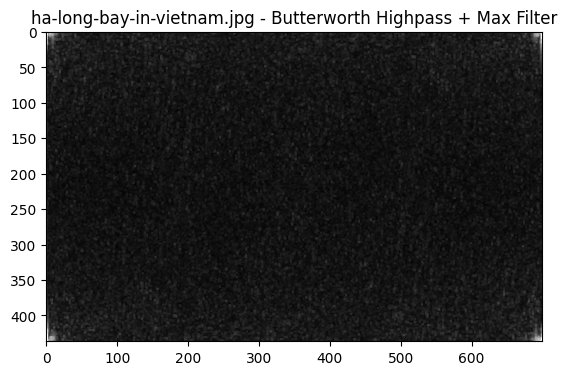

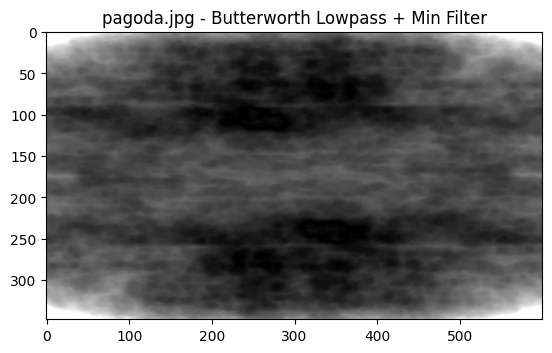

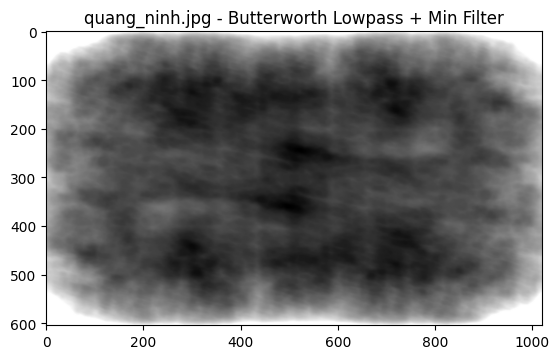

In [ ]:
from PIL import Image
import math
import scipy.fft
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.ndimage as sn
import random

folder = 'exercise'
output_folder = 'result'
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(folder):
    if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
        path = os.path.join(folder, filename)
        img_rgb = Image.open(path).convert('RGB')
        r, g, b = img_rgb.split()
        channels = [r, g, b]
        random.shuffle(channels)
        shuffled_img = Image.merge('RGB', channels)

        img = shuffled_img.convert('L')
        im1 = np.asarray(img)
        c = abs(scipy.fft.fft2(im1))
        d = scipy.fft.fftshift(c)

        M, N = d.shape
        H = np.ones((M, N))
        center1, center2 = M / 2, N / 2
        r0 = 30.0
        t = 1
        t2 = 2 * t
        choice = random.choice(['low', 'high'])

        for i in range(M):
            for j in range(N):
                r1 = (i - center1) ** 2 + (j - center2) ** 2
                r = math.sqrt(r1)
                if r == 0:
                    H[i, j] = 1 if choice == 'low' else 0 
                else:
                    if choice == 'low':
                        H[i, j] = 1 / (1 + (r / r0) ** t2)
                    elif choice == 'high':
                        H[i, j] = 1 / (1 + (r0 / r) ** t2)

        H1 = H.astype(float)
        con = d * H1
        e = abs(scipy.fft.ifft2(con))
        if choice == 'low':
            e = sn.minimum_filter(e, size=3)
        elif choice == 'high':
            e = sn.maximum_filter(e, size=3)

        e = np.clip(e, 0, 255)
        e = e.astype(np.uint8)
        im3 = Image.fromarray(e)

        plt.imshow(im3, cmap='gray')
        plt.title(f"{filename} - Butterworth {choice.capitalize()}pass + {'Min' if choice=='low' else 'Max'} Filter")
        plt.savefig(os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_plot.jpg"))
        plt.show()
        plt.close() 

        output_name = f"{os.path.splitext(filename)[0]}_Butterworth_{choice}.jpg"
        im3.save(os.path.join(output_folder, output_name))
